In [148]:
import os
import sys

import numpy as np
import librosa
import librosa.display

import pysptk
import pysas
from scipy.io import wavfile

import matplotlib.pyplot as plt
import seaborn
seaborn.set(style="dark")

import pyaudio
import wave

from pysptk.synthesis import MLSADF, LMADF, MGLSADF, MGLSADF

%matplotlib inline

In [83]:
from IPython.display import Audio

In [84]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
CHUNK = 1024
PERIOD = 80

### Record Function

In [85]:
def record(output_raw_file, record_seconds):
    
    audio = pyaudio.PyAudio()

    # start Recording
    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        frames_per_buffer=CHUNK)

    print("recording...")
    frames = []

    for i in range(0, int(RATE / CHUNK * record_seconds)):
        data = stream.read(CHUNK)
        frames.append(data)

    print("finished recording")


    # stop Recording
    stream.stop_stream()
    stream.close()
    audio.terminate()


    file = open(output_raw_file, "wb")
    file.write(b''.join(frames))
    file.close()

### rawPlay Function

In [86]:
def raw2wav(fn):
    os.system("raw2wav %s" % fn)

In [87]:
def wavfile_orig(fn):
    fs, x = wavfile.read("%s" % fn)
    return fs, x

In [88]:
def play_wav(x, fs):
    return Audio(x, rate=fs)

### extract Pitch Function

In [120]:
def plot_pitch(x, fs):
     return plt.plot(x, linewidth=3, label="F0 trajectory estimated by SWIPE'")

In [121]:
def extract_pitch(x, fs):
    plot_pitch(x, fs)
    return pysptk.swipe(x.astype(np.float64), fs=fs, hopsize=80, min=60, max=200, otype="f0")

In [137]:
# hop_length = frame period

def get_frame(x, frame_length=1024, hop_length=80):
    return librosa.util.frame(x, frame_length, hop_length).astype(np.float64).T

In [144]:
def plot_mfcc(mcep, fs, alpha, frame_length, hop_length): 
    logH = pysptk.mgc2sp(mcep, alpha, 0.0, frame_length).real
    librosa.display.specshow(logH.T, sr=fs, hop_length=hop_length, x_axis="time", y_axis="linear")
    plt.colorbar()
    plt.title("Spectral envelope estimate from mel-cepstrum")

In [145]:
def extract_mfcc(x, fs, frame_length=1024, hop_length=80, order=25, alpha=0.42):
    frame = get_frame(x, frame_length, hop_length)
    windowed = frame * pysptk.blackman(frame_length)
    mcep = pysptk.mcep(windowed, order, alpha)
    plot_mfcc(mcep, fs, alpha, frame_length, hop_length)
    return mcep

### synthesize audio picth or speed

In [ ]:
def 

### Main Function

#### 01. 音声録音と特徴量の抽出

* 5秒間の音声録音
* 録音したrawデータをwavに変換
* wavファイルから、fs, xの取得
* fs, xから特徴量の抽出

In [131]:
record('./raw/test.raw', 5.0)

recording...
finished recording


In [132]:
raw2wav('./raw/test.raw')

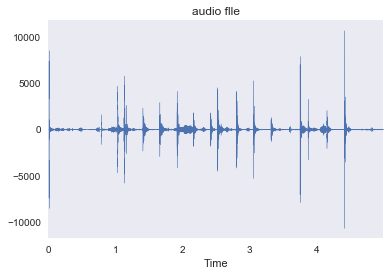

In [133]:
fs, x = wavfile_orig('./raw/test.wav')
plot_audio(x, fs)

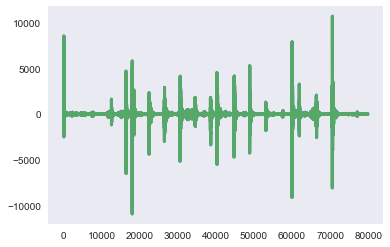

In [134]:
extract_pitch(x, fs)
plot_pitch(x, fs)

In [135]:
play_wav(x, fs)

array([[  4.06356053e+00,   1.91304258e+00,  -3.55767538e-01, ...,
          3.97836524e-02,  -6.27707143e-02,  -7.58609082e-02],
       [  3.47241977e+00,   2.05724489e+00,  -3.62621549e-01, ...,
          7.60277375e-02,  -6.66206538e-02,  -7.33706059e-02],
       [  3.29315602e+00,   2.07867243e+00,  -4.72868170e-01, ...,
          1.18201140e-01,  -2.12269763e-02,  -8.79413723e-02],
       ..., 
       [  2.04501244e+00,   1.41156931e+00,  -3.50816023e-02, ...,
         -1.45678794e-02,  -1.60214155e-02,  -3.28694968e-02],
       [  2.01172102e+00,   1.33470147e+00,  -1.34226424e-01, ...,
         -4.86906062e-03,  -2.76453716e-02,  -1.38572994e-02],
       [  2.02150765e+00,   1.23393187e+00,  -2.11858004e-01, ...,
          1.52715090e-02,  -6.06203703e-02,   2.96234291e-03]])

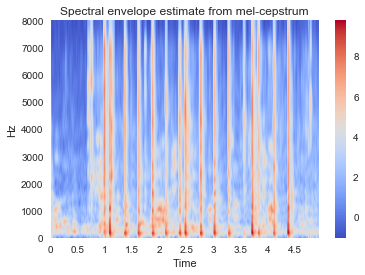

In [146]:
extract_mfcc(x, fs, frame_length=CHUNK, hop_length=PERIOD)

#### 02. ピッチの調整